# Cities and Their Weather Conditions

### Observations

* Climate in Southern Hemisphere is slightly milder than the one at the Northern Hemisphere. The reason behind this finding is the Southern Hemisphere has more ocean and than Northern Hemisphere. Water keeps the heat longer period than the land.
* With the help of the linear regression analysis and the correlation graphs, we can see that in northern hemisphere, there are strong negative relationship between Temperature and Latitude (correlation coefficient -0.83). On the other hand, in southern hemisphere, the positive relationship between temperature and latitude is not that strong (correlation coefficient 0.51). When you go away from equator, the decrease in temperature is much more in Northern Hemisphere than the one in Southern Hemisphere.
* Although linear regression did not show any strong relationship between the latitude and the wind speed, by looking at correlation plot, we can say that wind speed is lower in cities that are close to equator than the cities further to equator.
* Neither Humidity nor Cloudiness has strong correlation with latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Loop through the list of cities and request for data on each
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

print("Beginning Data Retrieval")
print("--------------------------------------------")
record = 0
set = 1
for index, city in enumerate(cities):
    record = record + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if record == 51:
        record = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {record} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        Date.append(response['dt'])
        Country.append(response['sys']['country'])
        Cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        Lat.append(np.nan)
        Lng.append(np.nan)
        Max_Temp.append(np.nan)
        Humidity.append(np.nan)
        Wind_Speed.append(np.nan)
        Date.append(np.nan)
        Country.append(np.nan)
        Cloudiness.append(np.nan)

print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | aporawan
City not found. Skipping...
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | conway
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | algiers
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | duma
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | seoul
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | peniche
Processing Record 20 of Set 1 | deqing
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | sisimiut
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Creating a dataframe to fill after looping in cities
cities_df = pd.DataFrame({
    'City': cities,
    "Lat": Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date
    })
    
cities_df.to_csv('output')

len(cities_df)

604

## Inspect the data and remove the cities where the humidity > 100%.
----
This step was skipped because there are no cities that have humidity > 100%. 

In [6]:
#This step is skipped because the max Humidity is 
cities_df['Humidity'].max()

100.0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

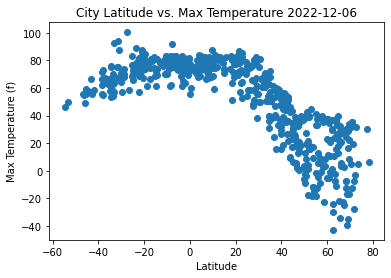

In [7]:
date_time = datetime.date(datetime.now())
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title(f'City Latitude vs. Max Temperature {date_time}')
plt.savefig("../output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

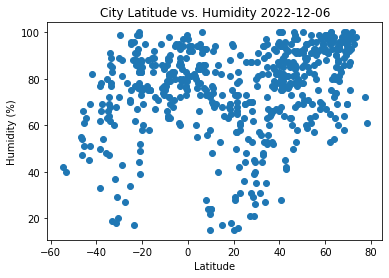

In [8]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity {date_time}')
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

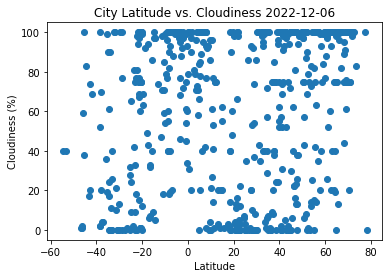

In [9]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness {date_time}')
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

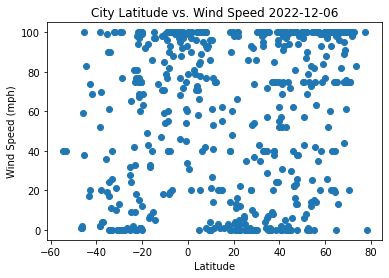

In [10]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed {date_time}')
plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [11]:
# creating datasets of two different hemispheres
north_cities = cities_df.loc[cities_df['Lat'] >= 0]
south_cities = cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.84


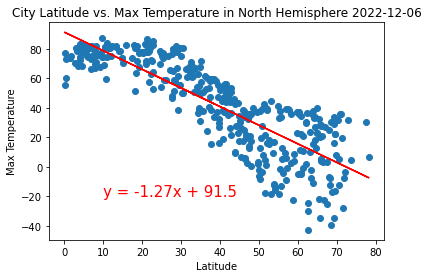

<Figure size 432x288 with 0 Axes>

In [20]:
x = north_cities['Lat']
y = north_cities['Max Temp']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.title(f'City Latitude vs. Max Temperature in North Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_max_temp_lat_lin.png", bbox_inches="tight")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.56


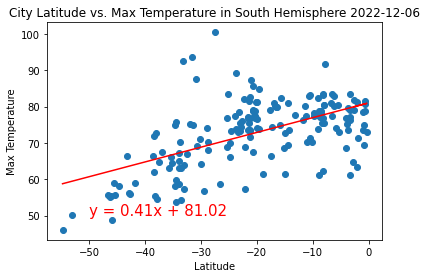

<Figure size 432x288 with 0 Axes>

In [13]:
x = south_cities['Lat']
y = south_cities['Max Temp']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title(f'City Latitude vs. Max Temperature in South Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_max_temp_lat_lin.png", bbox_inches="tight")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.33


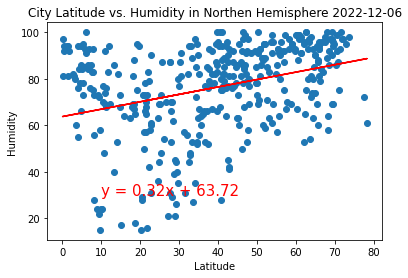

<Figure size 432x288 with 0 Axes>

In [14]:
x = north_cities['Lat']
y = north_cities['Humidity']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title(f'City Latitude vs. Humidity in Northen Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_humidity_lat_lin.png", bbox_inches="tight")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.45


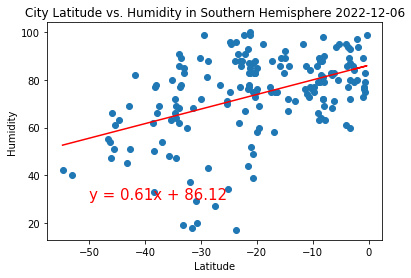

<Figure size 432x288 with 0 Axes>

In [15]:
x = south_cities['Lat']
y = south_cities['Humidity']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title(f'City Latitude vs. Humidity in Southern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_humidity_lat_lin.png", bbox_inches="tight")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.24


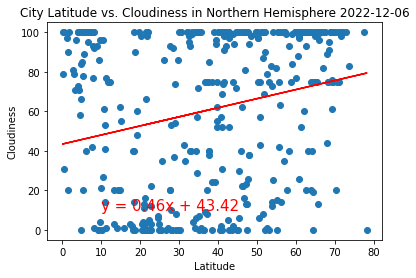

<Figure size 432x288 with 0 Axes>

In [16]:
x = north_cities['Lat']
y = north_cities['Cloudiness']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title(f'City Latitude vs. Cloudiness in Northern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_cloudiness_lat_lin.png", bbox_inches="tight")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.45


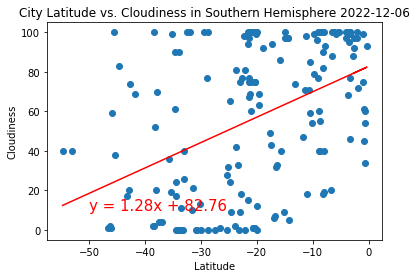

<Figure size 432x288 with 0 Axes>

In [17]:
x = south_cities['Lat']
y = south_cities['Cloudiness']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title(f'City Latitude vs. Cloudiness in Southern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_cloudiness_lat_lin.png", bbox_inches="tight")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.2


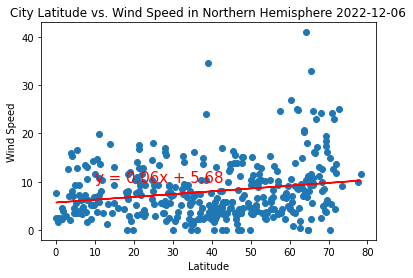

<Figure size 432x288 with 0 Axes>

In [18]:
x = north_cities['Lat']
y = north_cities['Wind Speed']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title(f'City Latitude vs. Wind Speed in Northern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/northern_hemisphere_wind_speed_lat_lin.png", bbox_inches="tight")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.38


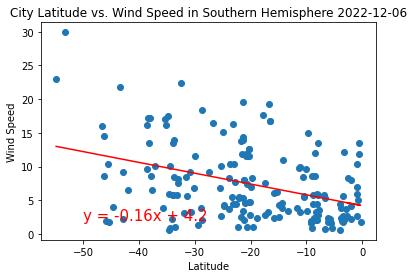

<Figure size 432x288 with 0 Axes>

In [19]:
x = south_cities['Lat']
y = south_cities['Wind Speed']

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(-50,2),fontsize=15,color="red")
plt.title(f'City Latitude vs. Wind Speed in Southern Hemisphere {date_time}')

print(f'The r-value is {round(rvalue,2)}')

plt.show()
plt.savefig("../output_data/southern_hemisphere_wind_speed_lat_lin.png", bbox_inches="tight")